In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
data = pd.read_csv('../data/HBN.csv')
data.head()

,Unnamed: 0,id,Enrol_Season,Age,Sex,CGAS-Season,CGAS-Score,Physical-Season,Physical-BMI,Physical-Height,...,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-Season,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-Season,PreInt_EduHx-computerinternet_hoursday,sii
0,0,00008ff9,Fall,5,0,Winter,51.0,Fall,16.877316,46.0,...,4.0,2.0,4.0,55.0,NaN,NaN,NaN,Fall,3.0,2.0
1,1,000fd460,Summer,9,0,NaN,NaN,Fall,14.035590,48.0,...,0.0,0.0,0.0,0.0,Fall,46.0,64.0,Summer,0.0,0.0
2,2,00105258,Summer,10,1,Fall,71.0,Fall,16.648696,56.5,...,2.0,1.0,1.0,28.0,Fall,38.0,54.0,Summer,2.0,0.0
3,3,00115b9f,Winter,9,0,Fall,71.0,Summer,18.292347,56.0,...,3.0,4.0,1.0,44.0,Summer,31.0,45.0,Winter,0.0,1.0
4,4,0016bb22,Spring,18,1,Summer,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data_step_light = pd.read_csv('../data/all_data_steps_light.csv')
data_step_light = data_step_light.rename(columns={'user_id':'id'})
data_step_light

,Unnamed: 0,day_number,weekday,daily_light_mean,daily_steps,quarter,id
0,0,1,1,79.87000,3255,2,cefdb7fe
1,1,2,2,45.33007,3728,2,cefdb7fe
2,2,3,3,79.81522,3128,2,cefdb7fe
3,3,4,4,122.51302,4341,2,cefdb7fe
4,4,5,5,155.06902,7289,2,cefdb7fe
...,...,...,...,...,...,...,...
25758,20,21,4,0.00000,0,4,57de6095
25759,21,22,5,0.00000,0,4,57de6095
25760,22,23,6,0.00000,0,4,57de6095
25761,23,24,7,0.00000,0,4,57de6095


In [4]:
data['id'].unique().size

3960

In [5]:
mean_light_steps = data_step_light.groupby(by=['id'],as_index=False)[['daily_light_mean', 'daily_steps']].mean()


In [6]:
data_matris_hambastegi = data[['id','Age', 'Physical-BMI', 'FGC-FGC_GSD', 'BIA-BIA_BMR','BIA-BIA_DEE','BIA-BIA_SMM', 'SDS-SDS_Total_T']]


In [7]:
df_corr = data_matris_hambastegi.merge(mean_light_steps, on='id', how='left')
df_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                3960 non-null   object 
 1   Age               3960 non-null   int64  
 2   Physical-BMI      3022 non-null   float64
 3   FGC-FGC_GSD       1074 non-null   float64
 4   BIA-BIA_BMR       1991 non-null   float64
 5   BIA-BIA_DEE       1991 non-null   float64
 6   BIA-BIA_SMM       1991 non-null   float64
 7   SDS-SDS_Total_T   2606 non-null   float64
 8   daily_light_mean  996 non-null    float64
 9   daily_steps       996 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 309.5+ KB


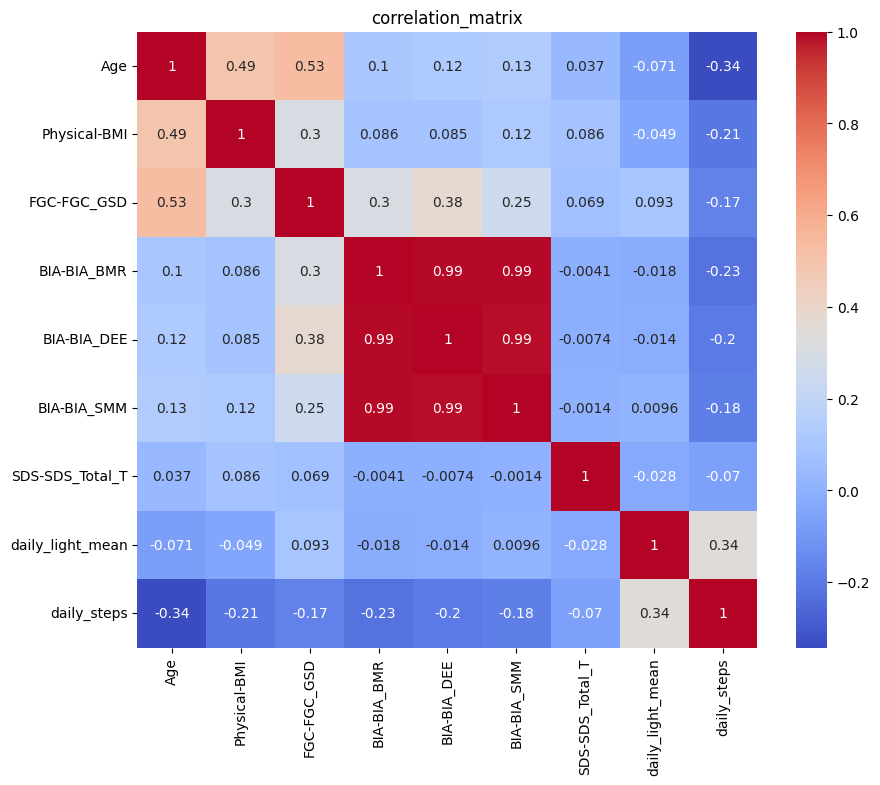

In [8]:
df_corr = df_corr.drop('id',axis = 1)
correlation_matrix = df_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('correlation_matrix')
plt.show()